<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Kernel%20Machines/AIML_CEP_Kernel_machines_31Oct2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large{\text{Kernel machines}}$ 

Let us first generate a synthetic data set to illustrate the deficiency of linear support vector machines. 

We shall generate $n$ samples where each sample is 2-dimensional of the form $x^i = (x^i_1,x^i_2), i \in \{1,2,\ldots,n\}$. For each sample $x^i$ we have the following labeling scheme:

$
\begin{align}
y^i = \begin{cases}
        +1 \text{ if } (x^i_1-1)^2 + (x^i_2-1)^2 < 1 \\ 
        -1 \text{ else. }
      \end{cases}
\end{align}
$

Hence the circle $(x^i_1-1)^2 + (x^i_2-1)^2 = 1$ (or equivalently $(x^i_1)^2 -2x^i_1 + (x^i_2)^2 -2x^i_2 = -1)$  forms a separating surface for the data. 

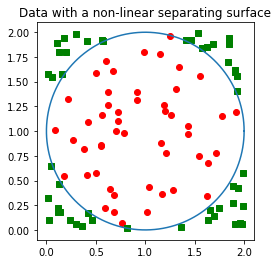

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 100

#seed the random number generator
np.random.seed(100)

X = [] 
y = [] 

radius = 1. 



center_point = np.array([1.,1.])
center_x1 = center_point[0]
center_x2 = center_point[1]

#generate points within circle (x1-1)^2 + (x2-1)^2 = 1
for i in range(int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low=0, high=2)  
  x2 = np.random.uniform(low=0, high=2)
  while (x1-center_x1)**2+(x2-center_x2)**2>radius:
    x1 = np.random.uniform(low=0, high=2)  
    x2 = np.random.uniform(low=0, high=2)

  #print('x1:',x1,'x2:',x2,(x1-center_x1)**2+(x2-center_x2)**2)
  X.append([x1,x2])
  y.append([1])


#generate points outside circle (x1-1)^2 + (x2-1)^2 = 1
for i in range(int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low=0, high=2)  
  x2 = np.random.uniform(low=0, high=2)
  while (x1-center_x1)**2+(x2-center_x2)**2<=radius:
    x1 = np.random.uniform(low=0, high=2)  
    x2 = np.random.uniform(low=0, high=2)
  
  #print('x1:',x1,'x2:',x2,(x1-center_x1)**2+(x2-center_x2)**2)
  X.append([x1,x2])
  y.append([-1])




X = np.array(X)
y = np.array(y)

#print('X:',X)
#print('y:',y)

#plot the circle
angle = np.linspace(0,2*np.pi,150) 
 

 
x1 = center_x1+radius * np.cos( angle ) 
x2 = center_x2+radius * np.sin( angle ) 
 
figure, axes = plt.subplots(1) 
 
axes.plot(x1,x2)
axes.set_aspect(1) 


plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')


plt.title( 'Data with a non-linear separating surface' ) 
plt.show() 

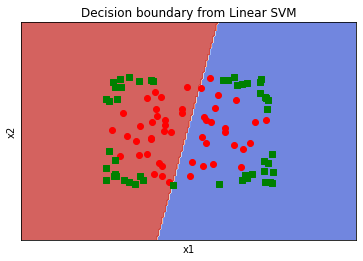

In [ ]:
#check the decision boundary obtained from Linear SVM
from sklearn.svm import LinearSVC #import linear SVM

clf = LinearSVC(C=1.0)
clf_model = clf.fit(X,y.ravel())

# create a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from Linear SVM')
plt.show()


Let us now use the transformation $\Phi$ of the form to transform the features into a high-dimensional space hoping that the transformed data would be linearly separable. 

We use the following transformation: For any $x=(x_1,x_2)$, 

$
\begin{align}
\Phi(x) = \Phi( (x_1,x_2) ) = (x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, 1). 
\end{align}
$

Thus suppose in the high-dimensional space, if there is a linear separator of the form $(\mathbf{w},b) = ((w_1,w_2,w_3,w_4,w_5),b)$ such that $\mathbf{w}^\top \Phi (x) + b  = 0$ is the linear separator. 

We shall check if indeed for the transformed space we would have a linear separator or not. 

In [ ]:
#transform the data 

X_transformed = []
for i in range(num_samples):
  x1=X[i,0]
  x2=X[i,1]
  X_transformed.append([x1**2,x2**2,np.sqrt(2)*x1,np.sqrt(2)*x2,1.])

X_transformed = np.array(X_transformed) 
#print(X_transformed)

clf = LinearSVC(C=10., max_iter = 10000)
clf_model = clf.fit(X_transformed,y.ravel())

predicted_labels = clf_model.predict(X_transformed)
print(predicted_labels)

train_error = np.sum(0.5*np.abs(predicted_labels-y.ravel()))/len(y)*100.0
train_accuracy = 100.0-train_error 

print('train accuracy:', train_accuracy)



[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy: 99.0


Hence in the transformed space, we would be able to solve the hard-SVM problem:

$\begin{align}
\min_{\mathbf{w},b} & \frac{1}{2} \|\mathbf{w}\|_2^2 \nonumber \\
\text{such that } & y^i (\mathbf{w}^\top \Phi(x^i) + b) \geq 1 \ \forall i \in \{1,2,\ldots,n\}.
\end{align}
$


Then the variable $\mathbf{w}$ can be written as: $\mathbf{w} = \sum_{i=1}^{n} \lambda^i y^i \Phi(x^i)$, where $\lambda^i$ are called the Lagrange multipliers associated with the constraints in the optimization problem. 

Hence during inference, for a test sample $\hat{x}$ we can use:
$
\begin{align}
\text{sign}(\mathbf{w}^\top \Phi(\hat{x}) + b) =  \text{sign} (\sum_{i=1}^{n} \lambda^i y^i \Phi(x^i)^\top \Phi(\hat{x}) + b).
\end{align}
$

Note that during inference of a test sample $\hat{x}$, we compute the dot product $\Phi(x^i)^\top \Phi(\hat{x})$ between each transformed training sample $\Phi(x^i)$ and transformed test sample $\Phi(\hat{x})$. 

$\large{\text{Question:}}$ How do we find the transformation $\Phi$? 





Suppose if we compute the dot product between two transformed points $\mathbf{u},\mathbf{z}$ using our previous choice for $\Phi$, we get:

$
\begin{align}
\Phi(\mathbf{u})^\top \Phi(\mathbf{z}) &= (u_1^2, u_2^2, \sqrt{2} u_1, \sqrt{2} u_2, 1)^\top  (z_1^2, z_2^2, \sqrt{2} z_1, \sqrt{2} z_2, 1) \\
&= u_1^2 z_1^2 + u_2^2 z_2^2 + 2 u_1 z_1 + 2 u_2 z_2 + 1 \\ 
&= (\mathbf{u}^\top \mathbf{z}+1)^2. 
\end{align}
$

Hence the dot product between the transformed vectors in the transformed space can be represented using a transformation of the dot product between the original points in the ambient (or the original) space. 

That is, we can represent $\Phi(\mathbf{u})^\top \Phi(\mathbf{z})$ as a function $K(\mathbf{u}, \mathbf{z}) = (\mathbf{u}^\top \mathbf{z}+1)^2$. 

This function $K:\mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$ is called a $\textbf{kernel}$ function.  

Recall that $\mathcal{X}$ is the space of inputs. 

$\large{\text{Kernel trick}}$

Fortunately, finding a suitable choice of $\Phi$ transformation can be by-passed if we can find a suitable kernel function $K$ such that the dot product $\Phi(\mathbf{u})^\top \Phi(\mathbf{z})$ can be represented as $K(\mathbf{u},\mathbf{z})$. 

Indeed, this is possible using a result known as $\textbf{Mercer's theorem}$.

$\large{\text{Mercer's theorem}}$

$K$ satisfies:

$
\begin{align}
\int K(\mathbf{u}, \mathbf{z}) g(\mathbf{u}) g(\mathbf{z}) d\mathbf{u} d\mathbf{z} \geq 0 
\end{align}
$

for any function $g$ satisfying $\int g^2(\mathbf{u}) d\mathbf{u} < \infty$, if and only if  $K$ corresponds to a unique transformation $\Phi$ such that $K( \mathbf{u}, \mathbf{z}) = \Phi(\mathbf{u})^\top \Phi(\mathbf{z})$.  

Several possible choices of $K$ exist. Some examples are:



*   Polynomial kernel: $K(\mathbf{u}, \mathbf{z}) = (\mathbf{u}^\top \mathbf{z} + 1)^p$ 
*   Gaussian kernel (or) radial basis function (rbf) kernel: $K(\mathbf{u}, \mathbf{z}) = e^{-\frac{\|\mathbf{u}-\mathbf{z}\|^2}{2\sigma^2}}$

Let us try to use the RBF kernel on our original data and check. 

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma=50,max_iter = 10000)
clf_model = clf.fit(X,y.ravel())

predicted_labels = clf_model.predict(X)
print(predicted_labels)

train_error = np.sum(0.5*np.abs(predicted_labels-y.ravel()))/len(y)*100.0
train_accuracy = 100.0-train_error 

print('train accuracy:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy: 100.0


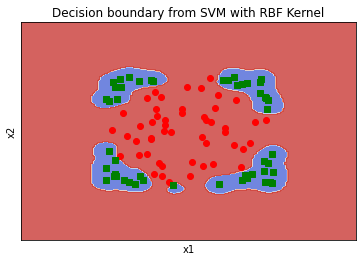

In [ ]:
# create a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel')
plt.show()


$\large{\text{Exercise}}$

1. Create a test data set $T$ for the synthetic data used in the discussion of kernel machines. 
1. On the synthetic data generated, try RBF Kernel with $\gamma \in \{0.0001, 0.001, 0.1, 1, 25, 75, 100\}$. Plot the decision boundaries for training data obtained in each case. Explain your observations. Check the performance of kernel machine for each value of $\gamma$ on the test data set $T$ and plot the decision boundaries in the context of test data set. Indicate which $\gamma$ values give similar performance on both the train data and test data. 
2. On the synthetic data generated, try polynomial kernel $K(\textbf{u},\textbf{v}) = (\textbf{u}^\top \textbf{v} + 1)^p$ with $p \in \{1,2,4,8,16,32,64,128\}$. Plot the decision boundaries for training data obtained in each case. Explain your observations. Check the performance of kernel machine for each value of $p$ on the test data set $T$ and plot the decision boundaries in the context of test data set. Indicate which $p$ values give similar performance on both the train data and test data.
